# Plantilla para automatización en WANDA con Python
*última actualización 5 de mayo 2025*
## Pasos previos
### Entorno recomendado
Para el uso de la API de WANDA y de Python en general, si se usa windows, se recomienda instalar directamente de la microsoft store el intérprete de Python (preferiblemente la versión 3.10, aúnque posteriormente con el entorno virtual ) y un editor de código, preferiblemente Visual Studio Code por la habilidad de poder ejecutar tanto código como los notebook (cómo este) además de poder añadir extensiones para su uso.
<br>
<img src="assets/python-ms.png" alt="python-ms" width="500"/>
<img src="assets/vscode-ms.png" alt="python-ms" width="545"/>

### Extras
En python existe algo llamado entorno virtual, esto lo que hace es asegurarse que las librerías usadas en el código (desde propias de wanda, como pywanda hasta las propias de tratamiento de datos de python como pandas, numpy o matplotlib) estén en las mismas versiones y que no hayan incompatibilidades entre usuarios de programa, para esto se usa UV, que gestiona la instalación de dependencias, creación de entorno virtual y manejo de versiones.

Con powershell (desde la terminal de windows) se ejecuta lo siguiente.

```bash
powershell -ExecutionPolicy ByPass -c "irm https://astral.sh/uv/install.ps1 | iex"
```

Una vez con UV instalado (si se quiere mas información se puede mirar [acá](https://docs.astral.sh/uv/getting-started/features/)) dentro de la carpeta se hace un `uv sync` desde la terminal de `wandalib` para tener un *virtual enviroment* el cual será el intérprete de código que ejecutará lo de este archivo.
<br>
<img src="assets/term-uv.png" alt="python-ms" width="545"/>

### Probar que funcione 
Para confirmar que esté funcional se ejecuta la siguiente celda, con *Control+Enter* y se selecciona el *.venv*. En caso de que no se encuentre, se busca dentro de la carpeta de wandalib. Con esto ya se podría empezar a ejecutar código.
<br>
<img src="assets/venv-ipynb.png" alt="python-ms" width="545"/>


In [10]:
print("Hola mundo desde python")

Hola mundo desde python


In [14]:
import os
import pywanda
import wandalib

In [13]:
cwd =  r'C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template\wanda_file'
wanda_bin = r'C:\Program Files (x86)\Deltares\Wanda 4.7\Bin\\'
wanda_file = os.path.join(cwd, "Example_Model.wdi")
wanda_basemodel = pywanda.WandaModel(wanda_file, wanda_bin)
print(wanda_basemodel)

<WandaModel object: C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template\wanda_file\Example_Model.wdi>


In [15]:
print(wandalib)
wandalib.get_all_components_dict(wanda_basemodel)

<module 'wandalib' from 'C:\\Users\\juan.guerrero\\Juan\\dev\\wandalib\\src\\wandalib\\__init__.py'>


{'PIPE': ['LINE MOMRAH 1',
  'LINE START 1',
  'LINE FARM 1',
  'LINE START 3',
  'LINE START 2',
  'LINE FARM 2',
  'LINE MOMRAH 2',
  'LINE MOMRAH 3'],
 'VALVE': ['MOMRAH', 'FARM'],
 'BOUNDH': ['B1', 'B3', 'B2'],
 'PUMP': ['P1', 'P2'],
 'T-JUNC': ['T1'],
 'TAP': ['MOMRAH', 'FARM'],
 'FCV': ['F1'],
 'CHECKV': ['C1', 'C2'],
 'VENT': ['V1', 'V2', 'V3', 'V4', 'V5'],
 'PuCV': ['F1', 'F2']}

In [ ]:
PIPE = ["PIPE LINE START 1", "PIPE LINE START 2", "PIPE LINE START 3", "PIPE LINE MOMRAH 2", "PIPE LINE MOMRAH 3"]
dir(wanda_basemodel)

# Si se corrió el modelo y se quiere cargar el resultado
wanda_basemodel.reload_output()

# Si se quiere correr el modelo directamente desde el script
# wanda_basemodel.run_steady()


[<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Pipeline Head'}, xlabel='Distance [m]', ylabel='Head [m]'>]

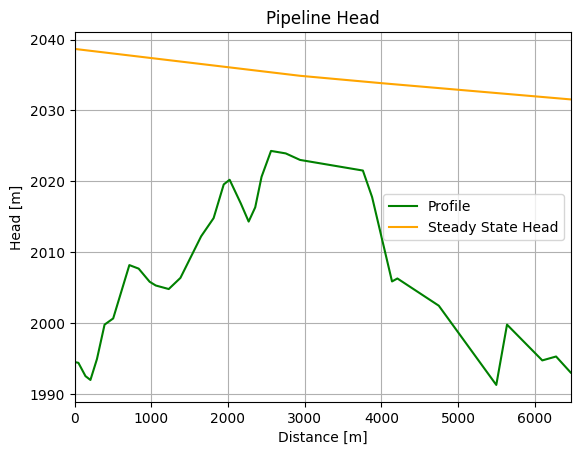

In [ ]:
steady_to_momrah, profile_to_momrah = wandalib.get_head_steady(wanda_basemodel, PIPE)
wandalib.graph.graph_steady_head(steady_to_momrah, profile_to_momrah)

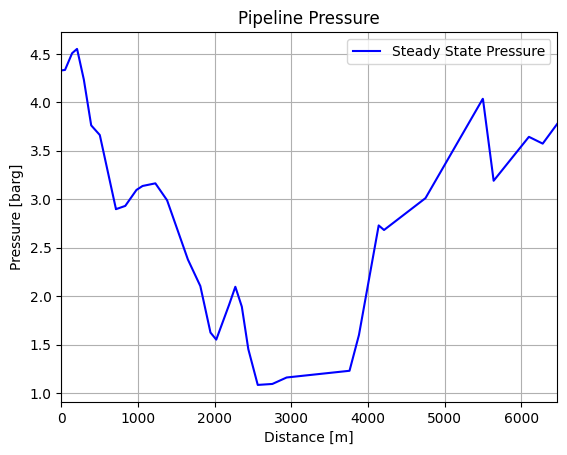

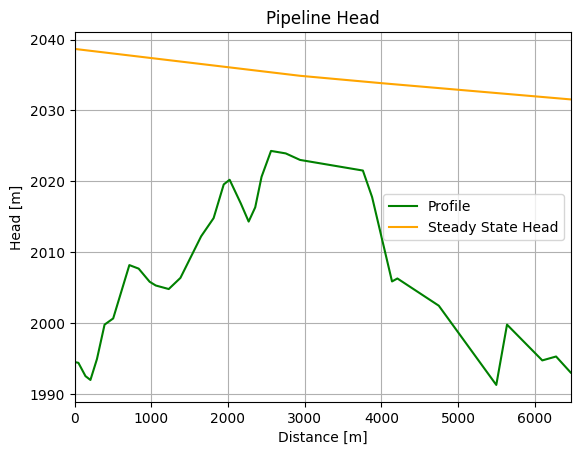

In [ ]:
wandalib.get_steady_results(wanda_basemodel, PIPE)
print("")

In [ ]:
from wandalib import Scenario, create_scenarios, assign_closing_time

transient_scenarios =[
    Scenario(
        scenario_name="CLOSURE_MOMRAH_VALVE",
        parameters={
            "VALVE MOMRAH": {
                "Action table": assign_closing_time(20)
                }
            }
        ), 
    # Scenario(
    #     scenario_name="PUMP_TRIP",
    #     parameters={
    #         "VALVE FARM": {
    #             "Action table": assign_closing_time(64)
    #             }
    #         }
    #     )
    ]
create_scenarios(wanda_file, transient_scenarios, wanda_bin, isUnsteady=True)

Directory 'transient_results' created successfully.
C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template\wanda_file\Example_Model.wdi
C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template\wanda_file\transient_results\CLOSURE_MOMRAH_VALVE.wdi
C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template\wanda_file\Example_Model.wdx
C:\Users\juan.guerrero\Juan\dev\wandalib\wanda_model_template\wanda_file\transient_results\CLOSURE_MOMRAH_VALVE.wdx


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\juan.guerrero\\Juan\\dev\\wandalib\\wanda_model_template\\wanda_file\\transient_results\\CLOSURE_MOMRAH_VALVE.wdi'